In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\aishw\OneDrive\Desktop\ML Project\ML BMI Data.csv')

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,120000,married,secondary,yes,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.shape

(45211, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [7]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [9]:
#Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [10]:
Mean=df.pdays.mean()
Median=df.pdays.median()
Mode=df.pdays.mode()

In [11]:
print(Mean)
print(Median)
print(Mode)

40.19782796222158
-1.0
0   -1
dtype: int64


<AxesSubplot:xlabel='pdays'>

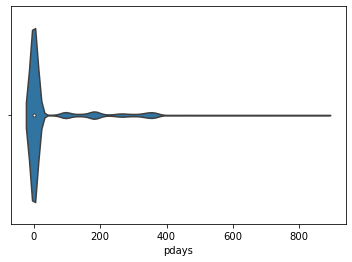

In [12]:
sns.violinplot(df['pdays'])

In [13]:
#Describe the pdays column again, this time limiting yourself to the relevant values of pdays. 
#How different are the mean and the median values?
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [14]:
df.pdays[df['pdays']!= -1].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

<AxesSubplot:xlabel='pdays'>

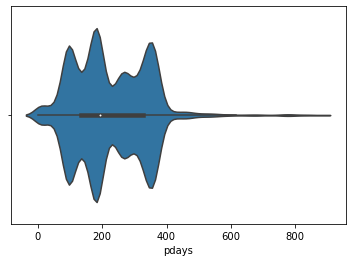

In [15]:
sns.violinplot(df.pdays[df['pdays']!= -1])

In [16]:
df1=(df[df['pdays']!= -1])

In [17]:
Mean=df1.pdays.mean()
Median=df1.pdays.median()
Mode=df1.pdays.mode()

In [18]:
print(Mean)
print(Median)
print(Mode)

224.57769165556496
194.0
0    182
dtype: int64


<AxesSubplot:ylabel='education'>

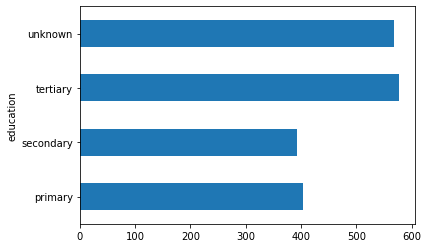

In [19]:
#Plot a horizontal bar graph with the median values of balance for each education level value.
#Which group has the highest median?
df.groupby(['education'])['balance'].median().plot.barh()

outliers without -1 values


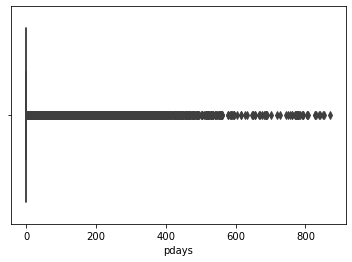

In [20]:
#Make a box plot for pdays. Do you see any outliers?
sns.boxplot('pdays',data=df)
print('outliers without -1 values')

outliers having -1 values


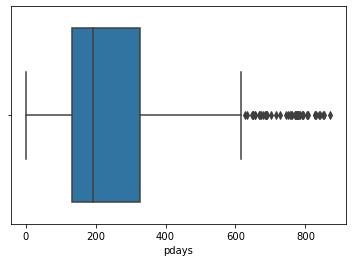

In [21]:
sns.boxplot('pdays',data=df[df['pdays']!= -1])
print('outliers having -1 values')

<AxesSubplot:>

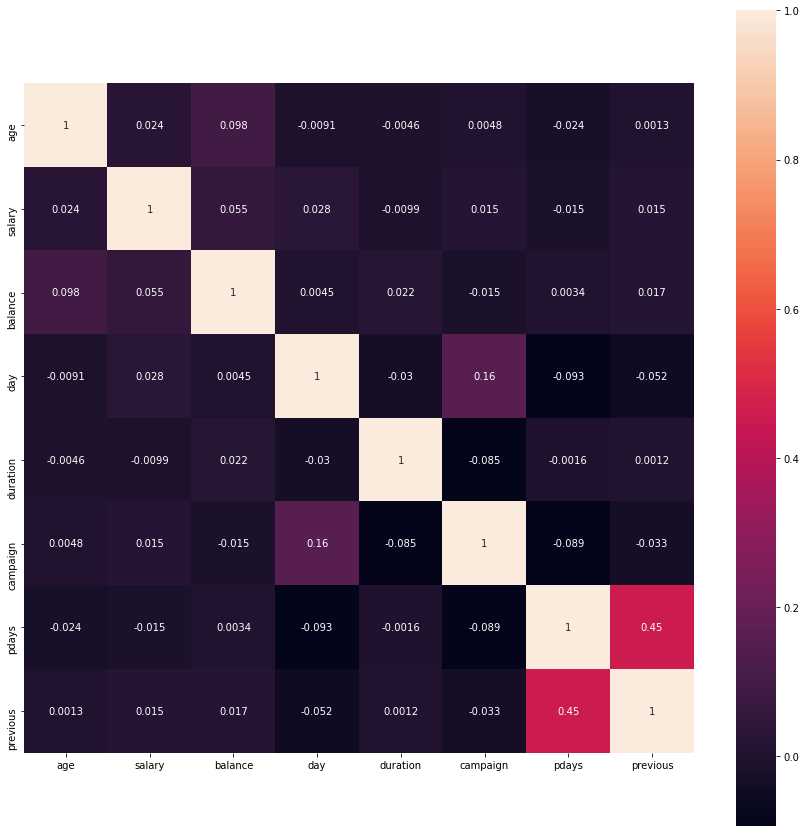

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),square=True,annot=True)

In [23]:
df.nunique()

age            77
job            12
salary         11
marital         3
education       4
targeted        2
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
response        2
dtype: int64

In [24]:
df2=df.drop(df[df['pdays']<0].index)

In [25]:
df2.shape

(8257, 19)

In [26]:
## replacing response into 0 and 1
df2.replace({'response':{'yes':1,'no':0}},inplace=True)

In [27]:
df2.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


In [28]:
##separating categorical and numerical
cols=df2.columns
num_cols=df2._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))

In [29]:
print(num_cols)
print(cat_cols)

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'response'],
      dtype='object')
['targeted', 'poutcome', 'housing', 'education', 'contact', 'marital', 'default', 'job', 'loan', 'month']


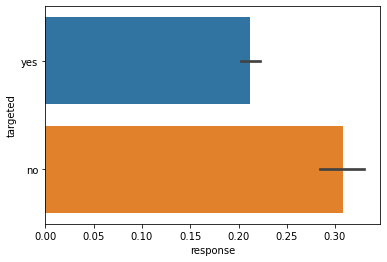

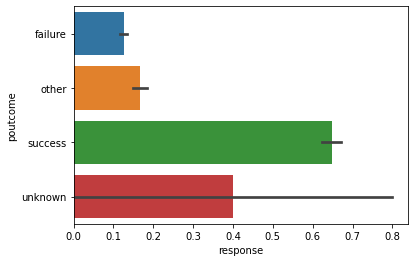

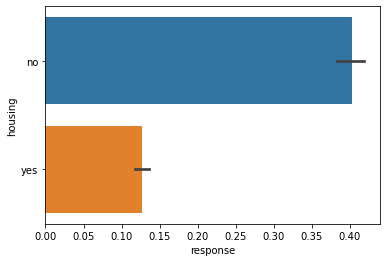

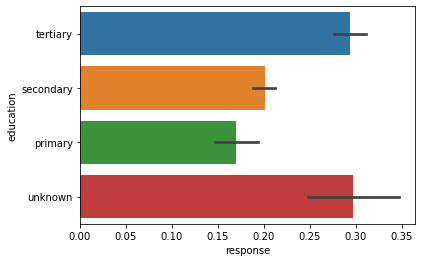

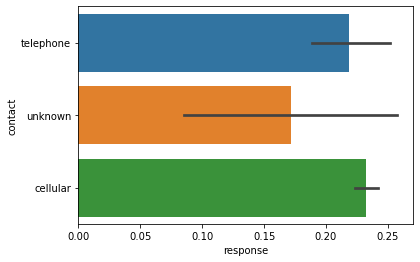

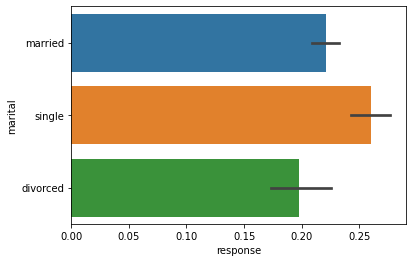

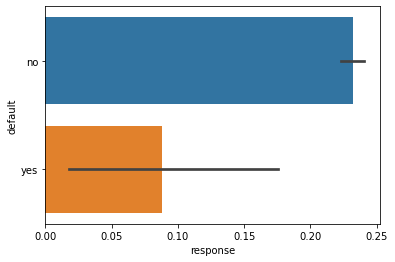

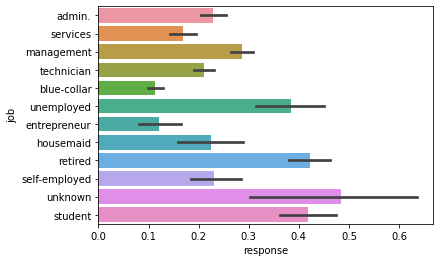

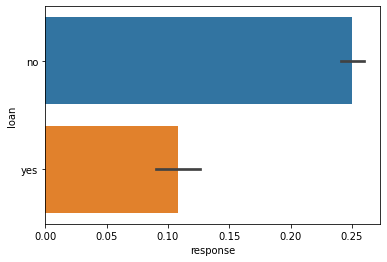

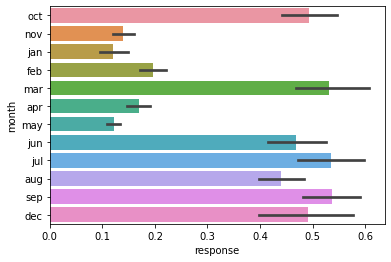

In [30]:
#visualizing categorical feauture with response
for i in df2[cat_cols]:
    sns.barplot(df2.response,df2[i])
    plt.show()

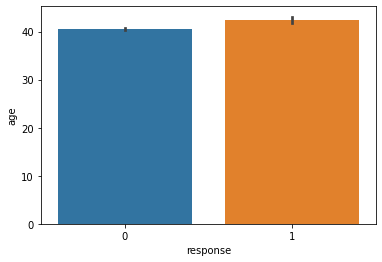

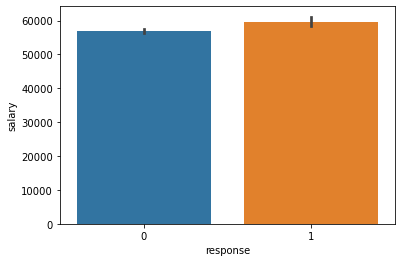

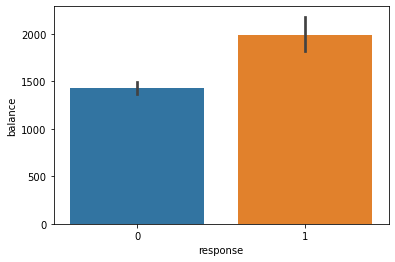

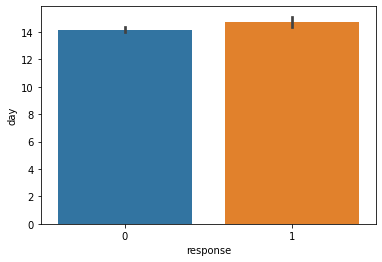

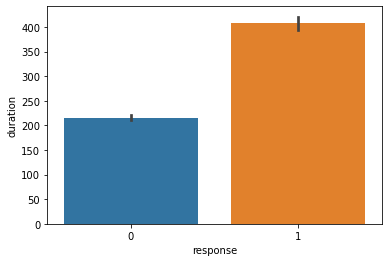

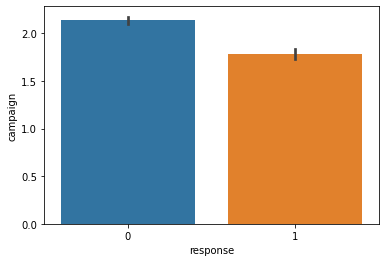

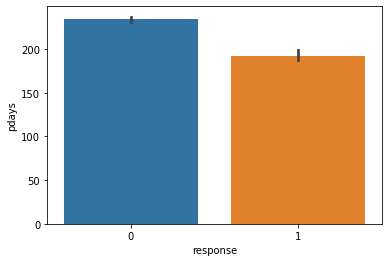

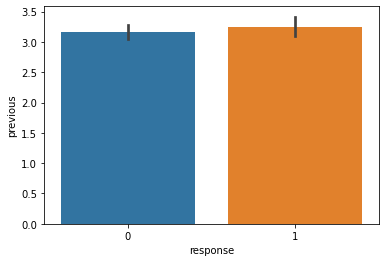

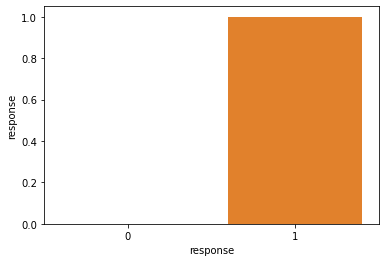

In [31]:
#visualizing numeric feauture with response
for i in df2[num_cols]:
    sns.barplot(df2.response,df2[i])
    plt.show()

In [32]:
df2[cat_cols]

,targeted,poutcome,housing,education,contact,marital,default,job,loan,month
24060,yes,failure,no,tertiary,telephone,married,no,admin.,no,oct
24062,yes,other,yes,secondary,telephone,single,no,admin.,yes,oct
24064,yes,failure,yes,secondary,telephone,married,no,services,no,oct
24072,yes,other,yes,tertiary,telephone,married,no,management,no,oct
24077,yes,failure,yes,tertiary,telephone,married,no,management,no,oct
...,...,...,...,...,...,...,...,...,...,...
45199,yes,other,yes,secondary,cellular,single,no,blue-collar,no,nov
45201,yes,success,no,tertiary,cellular,married,no,management,no,nov
45204,yes,failure,no,secondary,cellular,married,no,retired,no,nov
45208,yes,success,no,secondary,cellular,married,no,retired,no,nov


In [33]:
df2[cat_cols].nunique()

targeted      2
poutcome      4
housing       2
education     4
contact       3
marital       3
default       2
job          12
loan          2
month        12
dtype: int64

In [34]:
df2[num_cols]

,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,33,50000,882,21,39,1,151,3,0
24062,42,50000,-247,21,519,1,166,1,1
24064,33,70000,3444,21,144,1,91,4,1
24072,36,100000,2415,22,73,1,86,4,0
24077,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...
45199,34,20000,1475,16,1166,3,530,12,0
45201,53,100000,583,17,226,1,184,4,1
45204,73,55000,2850,17,300,1,40,8,1
45208,72,55000,5715,17,1127,5,184,3,1


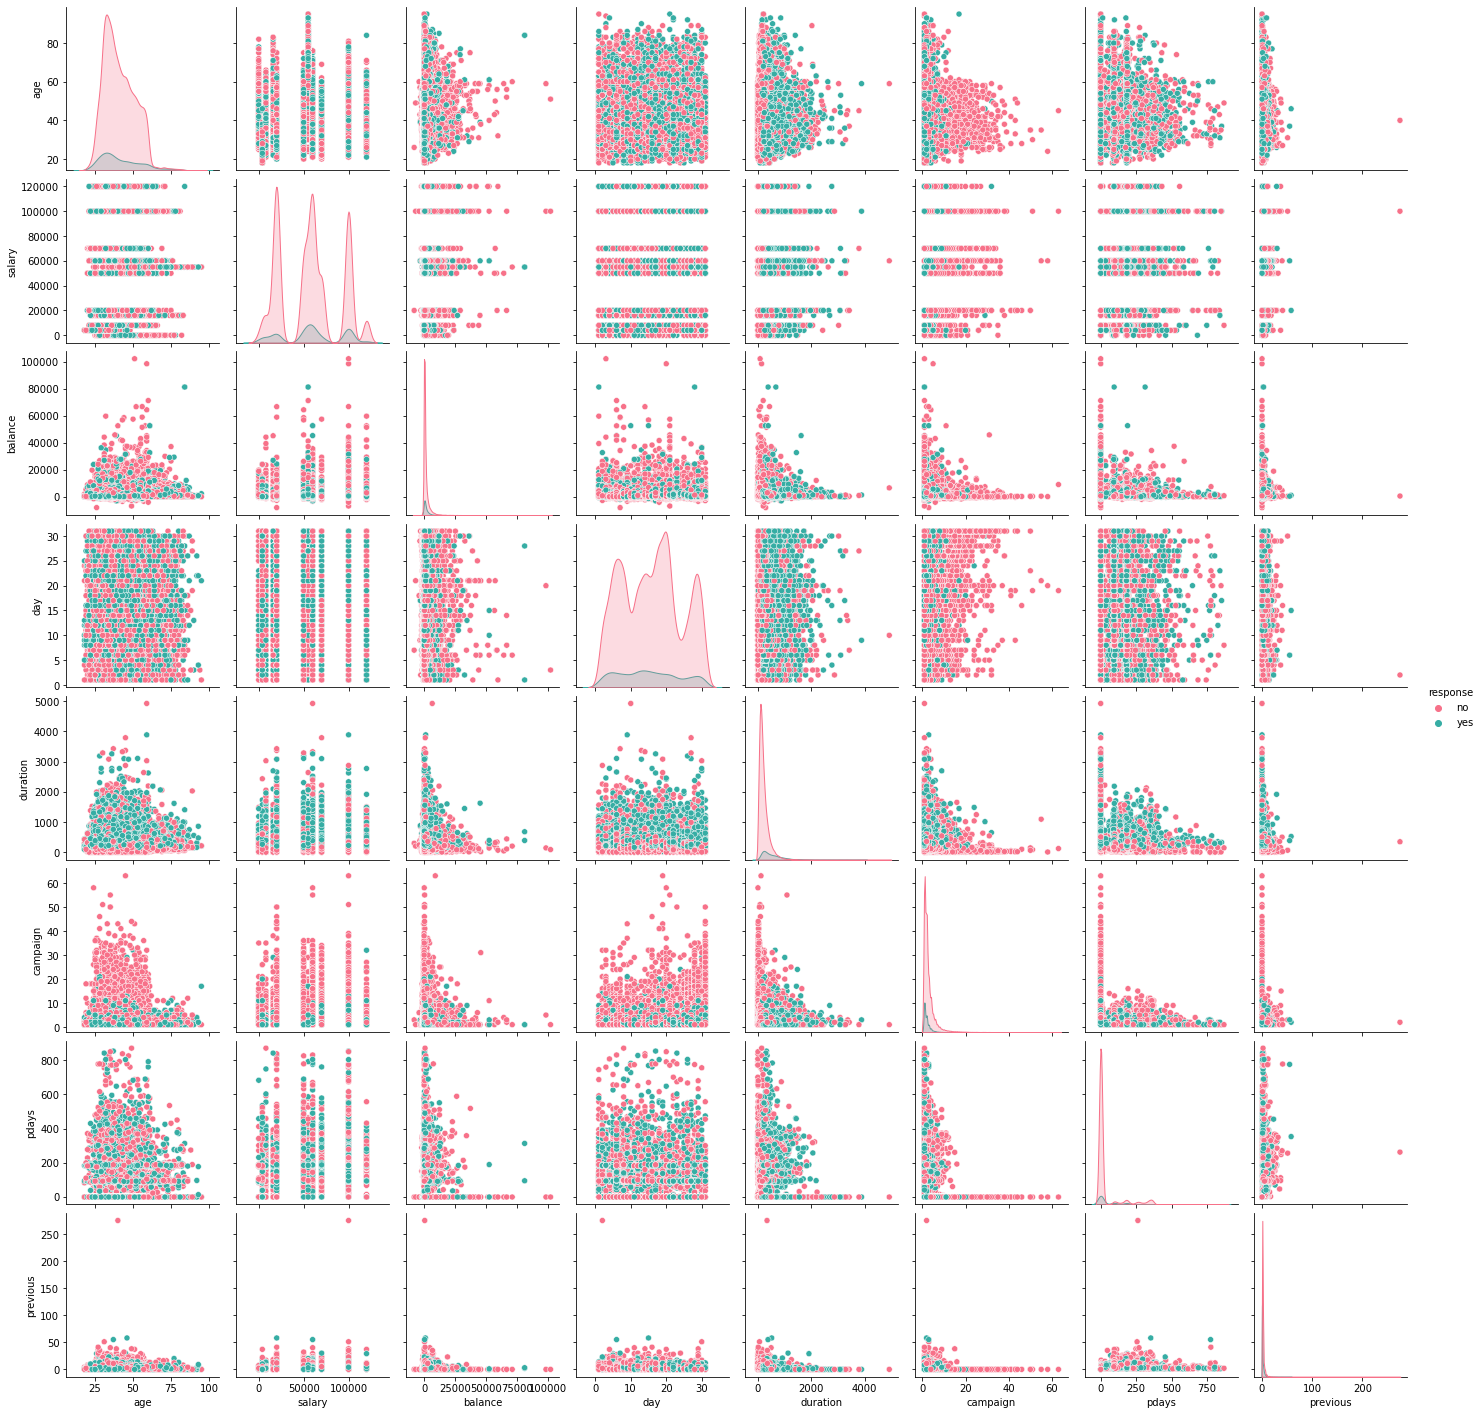

In [35]:
sns.pairplot(df, hue='response', palette="husl")

In [36]:
df_grouped = df.groupby("response")
class_name_no = "no"
class_name_yes = "yes"
df_grouped_no = df_grouped.get_group(class_name_no)
df_grouped_yes =df_grouped.get_group(class_name_yes)

Text(0, 0.5, 'Count')

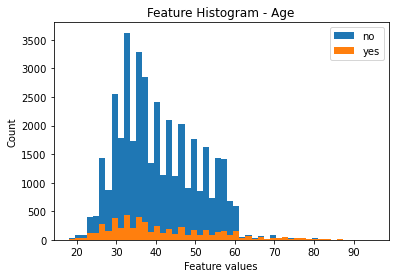

In [37]:
plt.figure()
plt.hist(df_grouped_no['age'], bins=50, label=class_name_no)
plt.hist(df_grouped_yes['age'], bins=50, label=class_name_yes)
plt.legend()
plt.title("Feature Histogram - Age")
plt.xlabel("Feature values")
plt.ylabel("Count")

In [38]:
from sklearn.preprocessing import LabelEncoder


In [39]:
df_cat = df2[cat_cols].apply(LabelEncoder().fit_transform)

In [40]:
df_cat

,targeted,poutcome,housing,education,contact,marital,default,job,loan,month
24060,1,0,0,2,1,1,0,0,0,10
24062,1,1,1,1,1,2,0,0,1,10
24064,1,0,1,1,1,1,0,7,0,10
24072,1,1,1,2,1,1,0,4,0,10
24077,1,0,1,2,1,1,0,4,0,10
...,...,...,...,...,...,...,...,...,...,...
45199,1,1,1,1,0,2,0,1,0,9
45201,1,2,0,2,0,1,0,4,0,9
45204,1,0,0,1,0,1,0,5,0,9
45208,1,2,0,1,0,1,0,5,0,9


In [41]:
dff = df_cat.join(df2[num_cols])

In [42]:
dff

,targeted,poutcome,housing,education,contact,marital,default,job,loan,month,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,1,0,0,2,1,1,0,0,0,10,33,50000,882,21,39,1,151,3,0
24062,1,1,1,1,1,2,0,0,1,10,42,50000,-247,21,519,1,166,1,1
24064,1,0,1,1,1,1,0,7,0,10,33,70000,3444,21,144,1,91,4,1
24072,1,1,1,2,1,1,0,4,0,10,36,100000,2415,22,73,1,86,4,0
24077,1,0,1,2,1,1,0,4,0,10,36,100000,0,23,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,1,1,1,1,0,2,0,1,0,9,34,20000,1475,16,1166,3,530,12,0
45201,1,2,0,2,0,1,0,4,0,9,53,100000,583,17,226,1,184,4,1
45204,1,0,0,1,0,1,0,5,0,9,73,55000,2850,17,300,1,40,8,1
45208,1,2,0,1,0,1,0,5,0,9,72,55000,5715,17,1127,5,184,3,1


<AxesSubplot:>

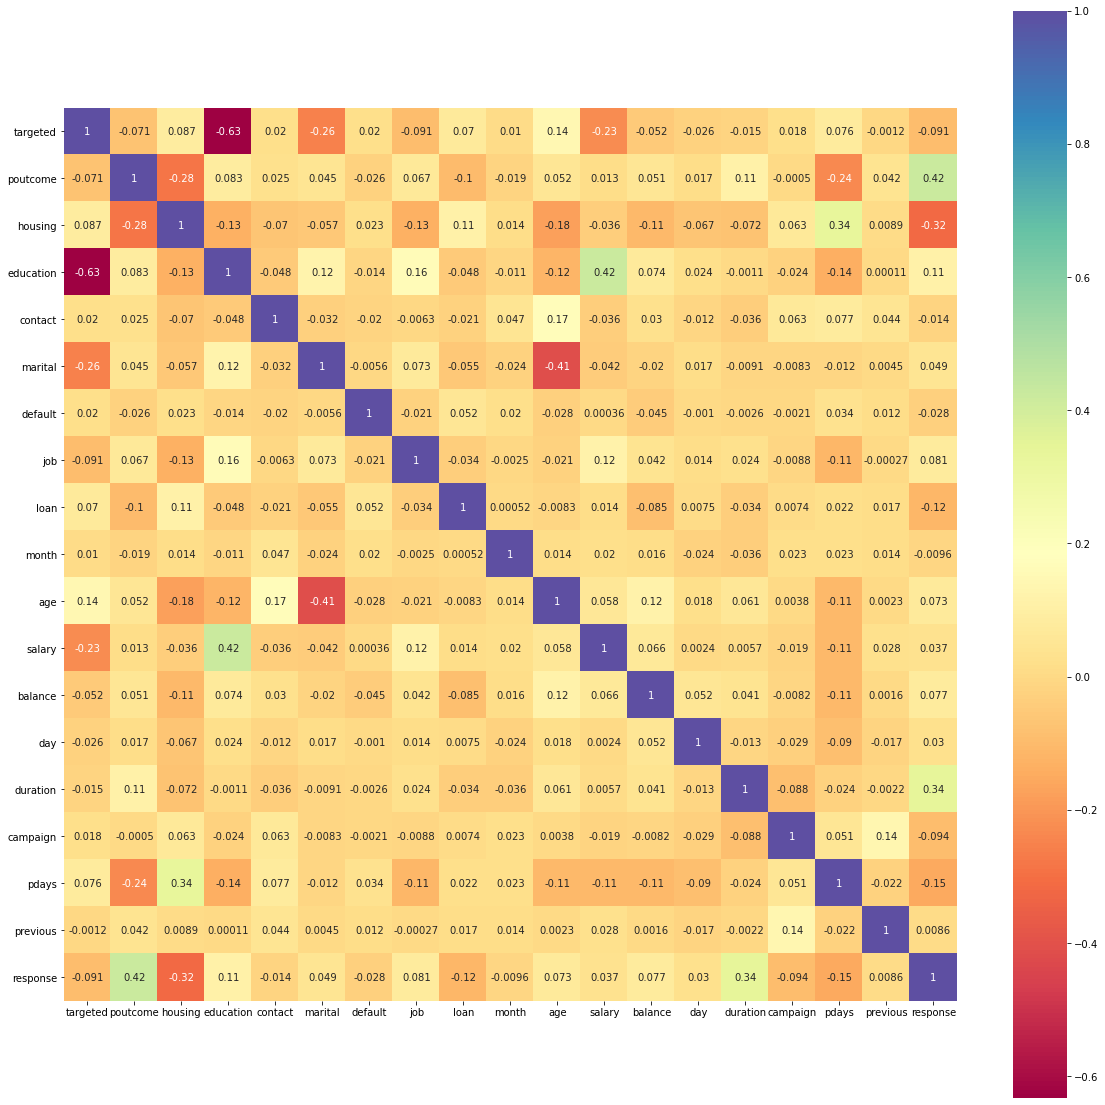

In [43]:
#HEAT MAP
plt.figure(figsize=(20,20))
sns.heatmap(dff.corr(),square=True,annot=True,cmap= 'Spectral')

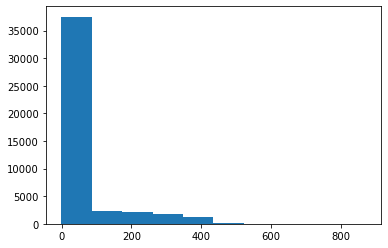

In [44]:
def drawhist(df,feature):
    plt.hist(df[feature])
drawhist(df,'pdays')


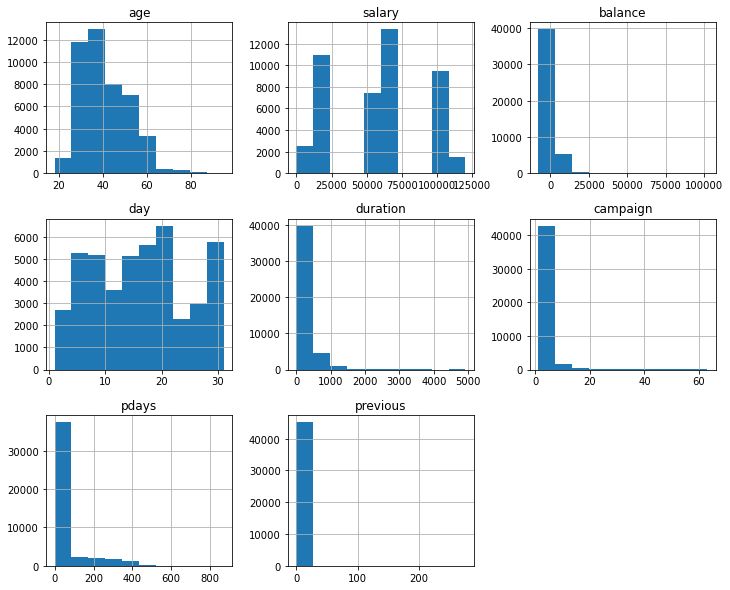

In [45]:
# Association of numerical variable
#display numerical feature distribution 
dist=df.hist(figsize=(12,10))

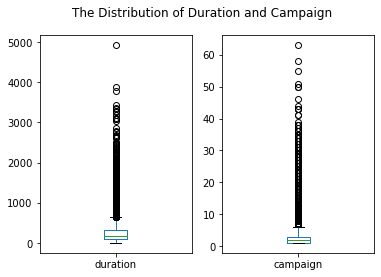

In [46]:
#distribution of duration of campaign.
dist_dur_cam = df[['duration','campaign']].plot(kind = 'box',subplots = True, layout = (1,2),sharex = False, sharey = False,title='The Distribution of Duration and Campaign')
plt.show()

NameError: name 'fig' is not defined

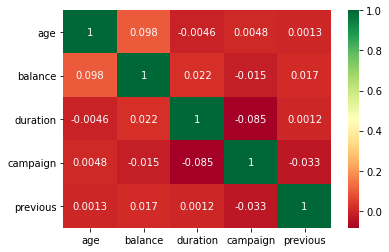

In [47]:
corr_data = df[['age','balance','duration','campaign','month','previous','response']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn')
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [48]:
high_corr_variables = ['poutcome']
for var in high_corr_variables:
    df[var + '_co'] = (df[var] == 'unknown').astype(int)

In [49]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    a=pd.concat(dataframes,axis=1)
    a.columns=edu
    a=a.fillna(0)
    return a

cross_tab(df,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,366,984,119,795
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


In [50]:
#Are pdays and poutcome associated with the target?
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)

poutcome,failure,other,success,unknown
pdays,,,,
-1,0.000000,0.000000,0.000000,0.817367
1,0.000066,0.000066,0.000199,0.000000
2,0.000022,0.000774,0.000022,0.000000
3,0.000000,0.000022,0.000000,0.000000
4,0.000022,0.000000,0.000022,0.000000
...,...,...,...,...
838,0.000000,0.000022,0.000000,0.000000
842,0.000022,0.000000,0.000000,0.000000
850,0.000022,0.000000,0.000000,0.000000


In [51]:
df=df.drop('poutcome', axis=1)

In [52]:
lst=['housing','default','loan','targeted']



def conver(x):
    return x.map({'no':0,'yes':1})

for i in lst:
    df[[i]]=df[[i]].apply(conver)

lst=['job','education','marital','month']
for i in lst:
    dummy=pd.get_dummies(df[i],drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    df.drop([i],axis=1,inplace=True)

In [53]:
df.head()

,age,salary,targeted,default,balance,housing,loan,contact,day,duration,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,100000,1,0,2143,1,0,unknown,5,261,...,0,0,0,0,0,0,1,0,0,0
1,44,60000,1,0,29,1,0,unknown,5,151,...,0,0,0,0,0,0,1,0,0,0
2,33,120000,1,0,2,1,1,unknown,5,76,...,0,0,0,0,0,0,1,0,0,0
3,47,20000,0,0,1506,1,0,unknown,5,92,...,0,0,0,0,0,0,1,0,0,0
4,33,0,0,0,1,0,0,unknown,5,198,...,0,0,0,0,0,0,1,0,0,0


In [54]:
df.columns

Index(['age', 'salary', 'targeted', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'response', 'poutcome_co', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'secondary', 'tertiary',
       'unknown', 'married', 'single', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep'],
      dtype='object')

In [55]:
df.response

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: response, Length: 45211, dtype: object

In [56]:
X=df.drop('response', axis=1)
Y=df['response']

#Predictive model 1: Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [60]:
##splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)#20% data will use for test 

In [61]:
##deviding data into independent and target variable
X = dff.drop('response',axis=1)
y = dff['response']

In [62]:
X.head()

,targeted,poutcome,housing,education,contact,marital,default,job,loan,month,age,salary,balance,day,duration,campaign,pdays,previous
24060,1,0,0,2,1,1,0,0,0,10,33,50000,882,21,39,1,151,3
24062,1,1,1,1,1,2,0,0,1,10,42,50000,-247,21,519,1,166,1
24064,1,0,1,1,1,1,0,7,0,10,33,70000,3444,21,144,1,91,4
24072,1,1,1,2,1,1,0,4,0,10,36,100000,2415,22,73,1,86,4
24077,1,0,1,2,1,1,0,4,0,10,36,100000,0,23,140,1,143,3


In [63]:
y.head()

24060    0
24062    1
24064    1
24072    0
24077    1
Name: response, dtype: int64

In [64]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5779, 18), (2478, 18), (5779,), (2478,))

In [65]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [66]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1915
           1       0.57      0.17      0.26       563

    accuracy                           0.78      2478
   macro avg       0.68      0.57      0.57      2478
weighted avg       0.75      0.78      0.73      2478

F1 Score: 0.26430517711171664
confusion Matrix:
 [[1841  466]
 [  74   97]]
cross validation: [0.79539952 0.71065375 0.77892187 0.7752877  0.75529982]


In [67]:
##using RFE feature selection
from sklearn.feature_selection import RFE
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_train,y_train)
X_train_selected = rfe.transform(X_train)
X_train_selected.shape

(5779, 10)

In [68]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)
y_pred2 = lr.predict(X_test[cols])

Index(['targeted', 'poutcome', 'housing', 'education', 'contact', 'marital',
       'default', 'job', 'loan', 'campaign'],
      dtype='object')


In [69]:
print('Report:\n',classification_report(y_test, y_pred2))
print("F1 Score:",f1_score(y_pred2,y_test))
print('AUC score:',roc_auc_score(y_test,y_pred2))
print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))

Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      1915
           1       0.71      0.38      0.49       563

    accuracy                           0.82      2478
   macro avg       0.77      0.67      0.69      2478
weighted avg       0.81      0.82      0.80      2478

F1 Score: 0.49479768786127165
AUC score: 0.6670767846625454
confusion Matrix:
 [[1827  349]
 [  88  214]]


In [70]:
import statsmodels.api as sm
model = sm.OLS(y, X)
results = model.fit()
start = "\033[1m" ### for bold text
print(start)
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.473
Model:                            OLS   Adj. R-squared (uncentered):              0.471
Method:                 Least Squares   F-statistic:                              410.2
Date:                Sat, 03 Apr 2021   Prob (F-statistic):                        0.00
Time:                        07:00:02   Log-Likelihood:                         -3019.6
No. Observations:                8257   AIC:                                      6075.
Df Residuals:                    8239   BIC:                                      6202.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [71]:
##from above summery we can say that some of features are higher p value,so lets check vifs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.66
0,targeted,6.44
3,education,6.38
11,salary,5.36
16,pdays,5.23
5,marital,4.37
13,day,4.07
9,month,3.56
2,housing,3.13
7,job,2.92


In [72]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['poutcome', 'housing', 'month', 'day', 'campaign', 'previous'], dtype='object')

In [73]:
X_cols =X.loc[:,['housing', 'month', 'poutcome', 'day','campaign', 'previous']]

In [74]:
X_cols

,housing,month,poutcome,day,campaign,previous
24060,0,10,0,21,1,3
24062,1,10,1,21,1,1
24064,1,10,0,21,1,4
24072,1,10,1,22,1,4
24077,1,10,0,23,1,3
...,...,...,...,...,...,...
45199,1,9,1,16,3,12
45201,0,9,2,17,1,4
45204,0,9,0,17,1,8
45208,0,9,2,17,5,3


In [75]:
cross_val_score(lr,X_cols,y)

array([0.75121065, 0.84200969, 0.86553604, 0.84736523, 0.66989703])

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc = RandomForestClassifier(n_estimators=20,max_depth=5,criterion='entropy',n_jobs=1,random_state=101)

In [78]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=20,
                       n_jobs=1, random_state=101)

In [79]:
y_pred1 = rfc.predict(X_test)

In [80]:
print('Report:\n',classification_report(y_test, y_pred1))
print("F1 Score:",f1_score(y_pred1,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))

Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      1915
           1       0.78      0.44      0.56       563

    accuracy                           0.84      2478
   macro avg       0.81      0.70      0.73      2478
weighted avg       0.84      0.84      0.83      2478

F1 Score: 0.5590909090909091
confusion Matrix:
 [[1844  317]
 [  71  246]]


In [81]:
cross_val_score(rfc,X,y)

array([0.78389831, 0.83656174, 0.84312538, 0.85584494, 0.6172017 ])

In [82]:
features=rfc.feature_importances_

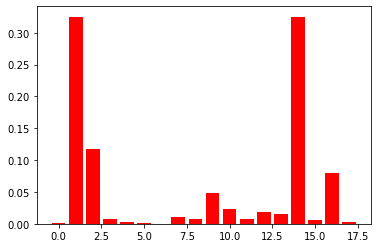

In [83]:
plt.bar(range(X_train.shape[1]),features,color='red')
plt.show()

In [84]:
imp_df = dff.iloc[:,[2,4,5,14,16]]

In [85]:
imp_df

,housing,contact,marital,duration,pdays
24060,0,1,1,39,151
24062,1,1,2,519,166
24064,1,1,1,144,91
24072,1,1,1,73,86
24077,1,1,1,140,143
...,...,...,...,...,...
45199,1,0,2,1166,530
45201,0,0,1,226,184
45204,0,0,1,300,40
45208,0,0,1,1127,184


In [86]:
y

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: response, Length: 8257, dtype: int64

In [87]:
x_train,x_test,y_train,y_test = train_test_split(imp_df,y,test_size=0.2,random_state=0)

In [88]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6605, 5), (1652, 5), (6605,), (1652,))

In [89]:
##logistic regression with imp features
logreg=LogisticRegression(random_state=0)

In [90]:
logreg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [91]:
y_predf = logreg.predict(x_test)

In [92]:
def LR():
    print('Report:\n',classification_report(y_test, y_predf))
    print("F1 Score:",f1_score(y_test,y_predf))
    print('confusion Matrix:\n',confusion_matrix(y_test,y_predf))

In [93]:
LR()

Report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      1255
           1       0.59      0.23      0.33       397

    accuracy                           0.78      1652
   macro avg       0.69      0.59      0.60      1652
weighted avg       0.75      0.78      0.74      1652

F1 Score: 0.33212996389891697
confusion Matrix:
 [[1190   65]
 [ 305   92]]


In [94]:
rfcf = RandomForestClassifier(criterion='gini',n_estimators=40,n_jobs=1,max_depth=5,random_state=0)

In [95]:
rfcf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=40, n_jobs=1, random_state=0)

In [96]:
y_predicf=rfcf.predict(x_test)

In [97]:
def RFC():
    print('Report:\n',classification_report(y_test, y_predicf))
    print("F1 Score:",f1_score(y_test,y_predicf))
    print('confusion Matrix:\n',confusion_matrix(y_test,y_predicf))

In [98]:
RFC()

Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1255
           1       0.63      0.41      0.50       397

    accuracy                           0.80      1652
   macro avg       0.73      0.67      0.69      1652
weighted avg       0.78      0.80      0.78      1652

F1 Score: 0.4977238239757208
confusion Matrix:
 [[1157   98]
 [ 233  164]]
